In [1]:
import nbsetup
import pickle
import matplotlib.pyplot as plt
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

In [2]:
SAVE_FIGURES = True
xlabel = 'Log($g_{pmog}$) [$ms^{-2}$]'
FILTER = 'Quality simulation'

In [3]:
raw = Result(load_sparc(namespace='pmog/201_21'))

In [13]:
raw.counts()

Everything 3212 163
Quality data 2017 92
Quality simulation 1428 92


In [28]:
raw.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,-0.118151,0.225234,3212,0.064674,0.254311
1,Quality data,-0.105954,0.202486,2017,0.052206,0.228487
2,Quality simulation,-0.097164,0.175305,1428,0.040151,0.200378


In [32]:
analysis = Tune(mcmc(raw.datasets()[FILTER], train_g=False, train_d=False, tight={'Inc': 1, 'Ymass': 3}))

In [33]:
tuned = analysis.Result(fast=False, simulations=raw.simulations)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Ymass, Inc]


/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 110 seconds.


In [34]:
tuned.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,-0.009691,0.132428,2017,0.017622,0.132749
1,Quality data,-0.009691,0.132428,2017,0.017622,0.132749
2,Quality simulation,-0.001142,0.077559,1428,0.006013,0.077541


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


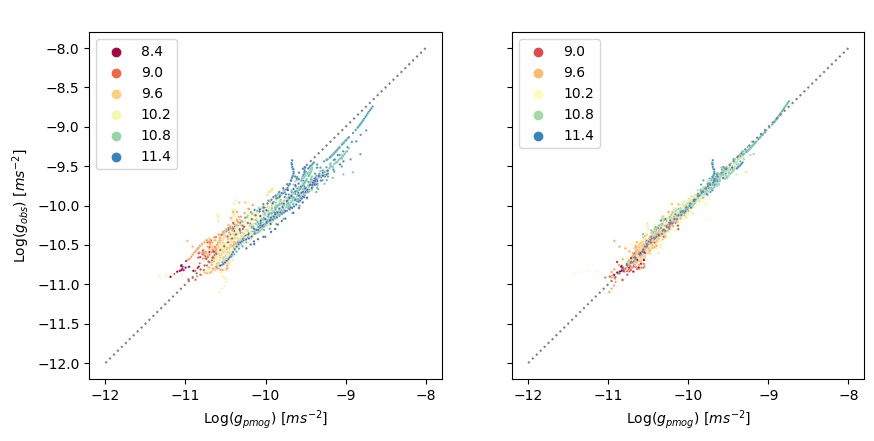

In [29]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4.5))
raw.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[0])
tuned.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[1])
if SAVE_FIGURES: fig.savefig('../figures/pmog_both_rar_quality.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


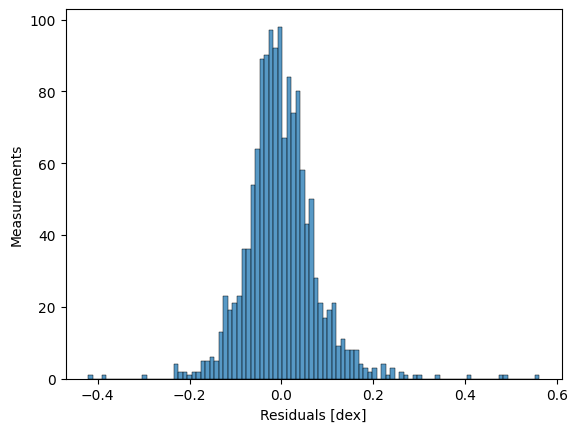

In [18]:
g, data = tuned.residual_hist(query_key=FILTER)
if SAVE_FIGURES: g.get_figure().savefig('../figures/pmog_hist.eps')

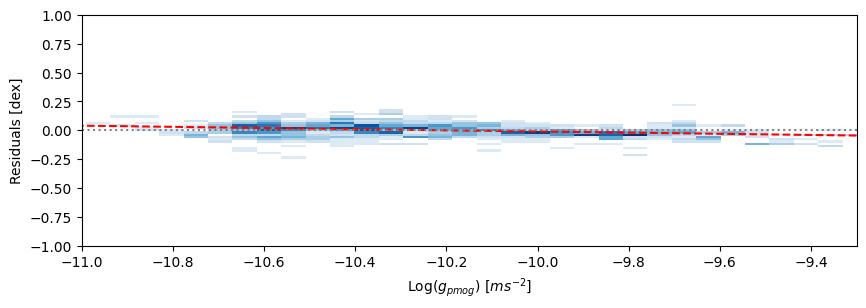

In [19]:
g = tuned.residual(tuned.datasets()[FILTER], ylim=(-1.0, 1.0), xlim=(-11, -9.3), xlabel='Log($g_{pmog}$) [$ms^{-2}$]')
if SAVE_FIGURES: g.get_figure().savefig('../figures/pmog_resid.eps')

/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


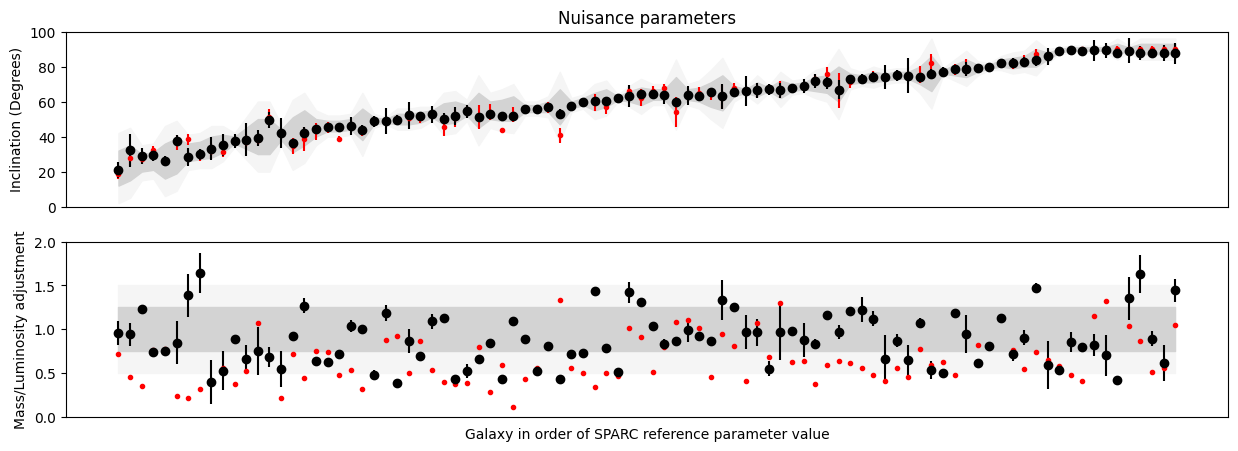

In [22]:
g = analysis.plot_nuissance(figsize=(15,5))
if SAVE_FIGURES: g.get_figure().savefig('../figures/pmog_nuisance.eps')

In [24]:
from references.sparc import adjustment_df
def_adjs = adjustment_df()

In [26]:
for key in ['Ymass', 'Inc']:
    for df in (def_adjs[def_adjs['Source']=='RAR'], tuned.adjustments):
        print(key, df[key].mean(), df[key].std())

Ymass 0.6412047619047619 0.4741717136162771
Ymass 0.8806630434782607 0.2982081018782023
Inc 56.964000000000006 20.227096200138448
Inc 61.14173913043479 18.0595467139576


In [51]:
baseline = pickle.load(open('standard.pickle', 'rb'))

<AxesSubplot:xlabel='Log($g_{pmog}$) [$ms^{-2}$]', ylabel='Residuals [dex]'>

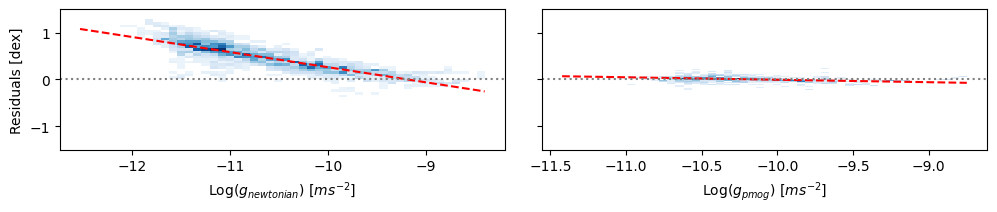

In [52]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,2))
plt.tight_layout()
baseline.residual(ax=axes[0], ylim=(-1.5, 1.5), xlabel='Log($g_{newtonian}$) [$ms^{-2}$]')
tuned.residual(tuned.datasets()[FILTER], ax=axes[1], ylim=(-1.5, 1.5), xlabel='Log($g_{pmog}$) [$ms^{-2}$]')

<AxesSubplot:xlabel='PMOG model Log(Mass) [$M_{solar}$]', ylabel='Residuals [dex]'>

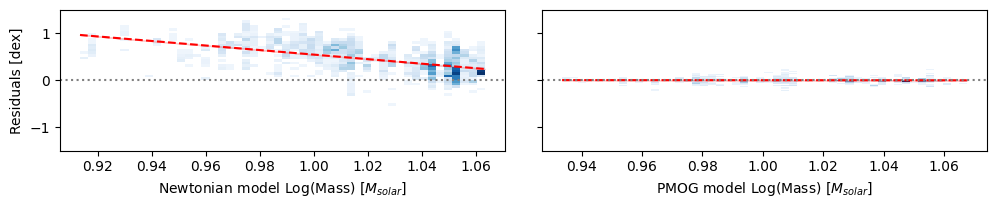

In [54]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,2))
plt.tight_layout()
standard.residual(resid='log_M', ax=axes[0], ylim=(-1.5, 1.5), xlabel='Newtonian model Log(Mass) [$M_{solar}$]')
tuned.residual(tuned.datasets()[FILTER], resid='log_M', ax=axes[1], ylim=(-1.5, 1.5), xlabel='PMOG model Log(Mass) [$M_{solar}$]')

In [50]:
tuned.dataframe['Sbar'] *= analysis.uni['gamma']**0.5

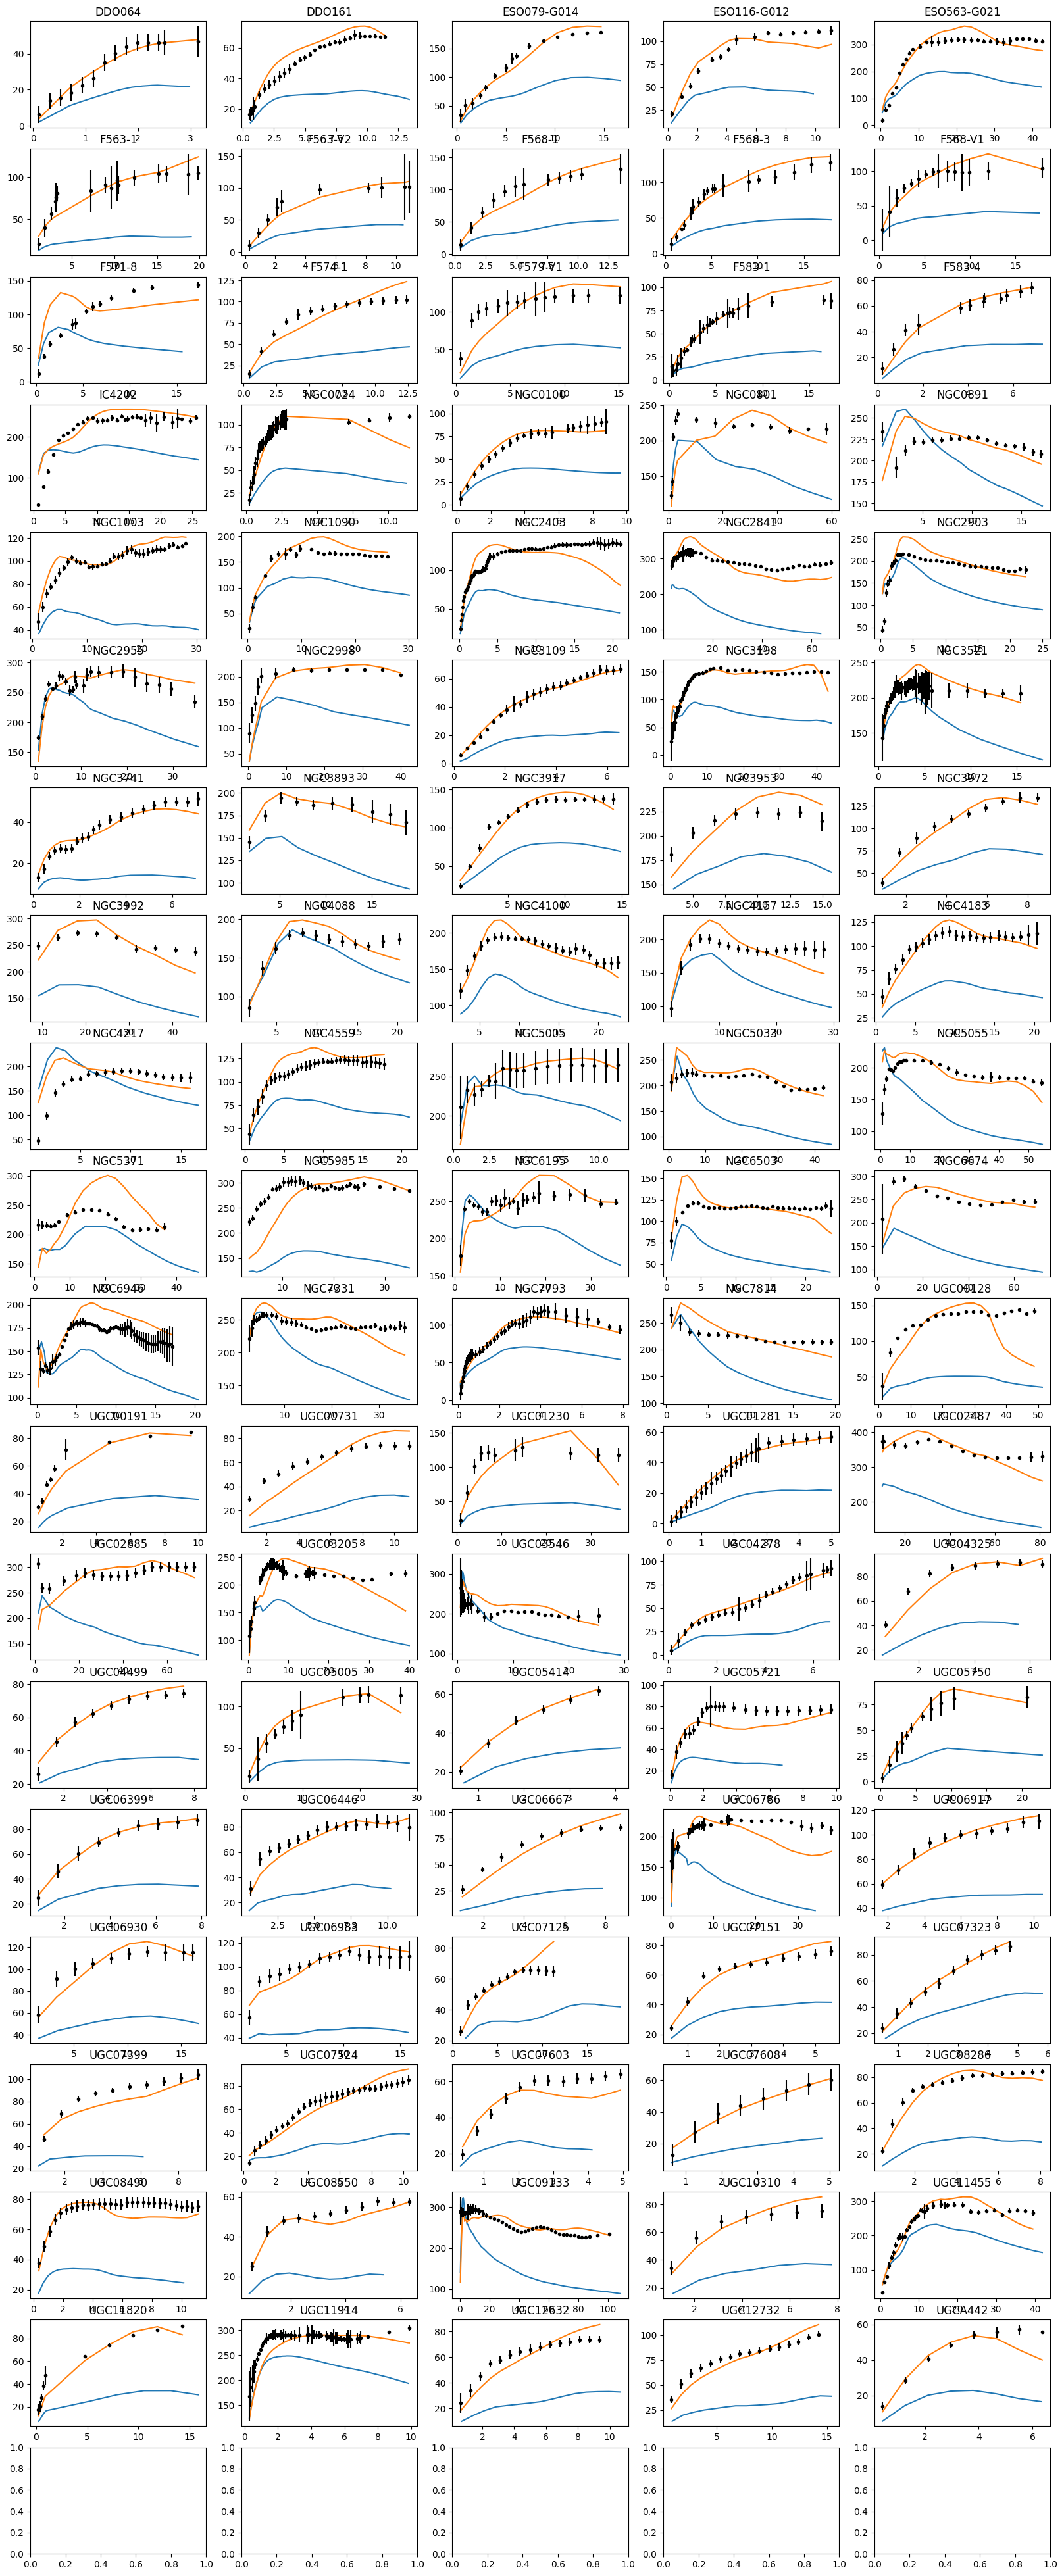

In [52]:
baseline = Result(load_sparc(namespace='baseline/201_21'))
g = tuned.plot_curves(baseline)

# Unconstrained tuning

In [24]:
unconstrained = Tune(mcmc(raw.datasets()[FILTER], train_g=False, tight={'Inc': 0.1, 'D': 5, 'Ymass': 0.1}))
superb = unconstrained.Result(fast=True, simulations=raw.simulations)
superb.residual_stats()

,filter,mean,std,count,mse,rmse
0,Everything,-0.002917,0.132598,2059,0.017582,0.132598
1,Quality data,-0.002917,0.132598,2059,0.017582,0.132598
2,Quality simulation,0.005605,0.077645,1459,0.006056,0.077820
